#### To use Altair for visualization, you need to install some sets of tools
##### Please make sure you've installed following packages:

> altair<br>
> jupyterlab

##### if not, check this out: __[Altair Installation](https://altair-viz.github.io/getting_started/installation.html)__


In [23]:
from openpyxl import load_workbook
import pandas as pd
from pprint import pprint
import altair as alt

In [24]:
# make df source for plot
def make_dataframe_source(sheet_values):
    df = pd.DataFrame(sheet.values)
    new_df = pd.DataFrame(sheet.values, columns=df.iloc[0])
    new_df = new_df[['rank','TEAM', 'OffRtg', 'DefRtg']]
    new_df['text'] = new_df['rank'].astype(str) + '  '+ new_df['TEAM']
    
    # re-select rows!!!!
    #   there are 2 rows which contains unexpected values
    #   re-select rows or not depends on your data
    new_df = new_df.iloc[2:]
    new_df['DefRtg'].astype(str).astype('float64')
    new_df['DefRtg'] = -new_df['DefRtg']

    return new_df


# gernate each head of dataframe
def show_dataframe_head(season_lst):   
    for i in season_lst:
        print('NBA season:', i[1], sep=' ')
        display(i[0].head())
        print(end='\n\n')
        

# feed source and show scatter plot
def show_scatter(source, source_title):
    # main plot
    f = alt.Chart(source).mark_point(size=120).encode(
        x='OffRtg',
        y='DefRtg',
        color='TEAM').properties(
                title='NBA {} 進攻 防守效率'.format(source_title)).interactive()

    # Configure text
    text = alt.Chart(source).mark_text(
        align='left',
        baseline='middle',
        fontSize = 8,
        dx = 7
    ).encode(
        x='OffRtg',
        y='DefRtg',
        text='text',
        color='TEAM'
    )

    rule = alt.Chart(source).mark_rule(color='gray').encode(y='mean(DefRtg)')
    rule_2 = alt.Chart(source).mark_rule(color='gray').encode(x='mean(OffRtg)')
    
    return f + text + rule + rule_2


In [25]:
# get workbook
wb = load_workbook("./data/nba_regu.xlsx")

# iterate 

season_lst = list()
for sheet in wb.worksheets:
    #print(sheet.title)
    
    sheet_title = sheet.title
    df = pd.DataFrame(sheet.values)
    
    if sheet_title == '2017-18':
        # maek source for plot
        source_1718 = make_dataframe_source(sheet.values)
        source_1718_title = sheet_title        
        season_lst.append([source_1718, source_1718_title])
    
    if sheet_title == '2016-17':
        # maek source for plot
        source_1617 = make_dataframe_source(sheet.values)
        source_1617_title = sheet_title
        season_lst.append([source_1617, source_1617_title])
    
    if sheet_title == '2015-16':
        # maek source for plot
        source_1516 = make_dataframe_source(sheet.values)
        source_1516_title = sheet_title
        season_lst.append([source_1516, source_1516_title])
        
    if sheet_title == '2014-15':
        # maek source for plot
        source_1415 = make_dataframe_source(sheet.values)
        source_1415_title = sheet_title
        season_lst.append([source_1415, source_1415_title])
        
    if sheet_title == '2013-14':
        # maek source for plot
        source_1314 = make_dataframe_source(sheet.values)
        source_1314_title = sheet_title
        season_lst.append([source_1314, source_1314_title])
        

In [26]:
# check
show_dataframe_head(season_lst)

NBA season: 2017-18


,rank,TEAM,OffRtg,DefRtg,text
2,1,Houston Rockets,114,-105.6,1 Houston Rockets
3,2,Toronto Raptors,112.9,-105.1,2 Toronto Raptors
4,3,Golden State Warriors,112.7,-106.8,3 Golden State Warriors
5,4,Boston Celtics,106.7,-103.1,4 Boston Celtics
6,5,Philadelphia 76ers,108.3,-103.8,5 Philadelphia 76ers




NBA season: 2016-17


,rank,TEAM,OffRtg,DefRtg,text
2,1,Golden State Warriors,114.8,-103.4,1 Golden State Warriors
3,2,San Antonio Spurs,110.3,-102.8,2 San Antonio Spurs
4,3,Houston Rockets,114.1,-108.4,3 Houston Rockets
5,4,Boston Celtics,110.6,-108,4 Boston Celtics
6,5,Cleveland Cavaliers,112.8,-109.7,5 Cleveland Cavaliers




NBA season: 2015-16


,rank,TEAM,OffRtg,DefRtg,text
2,1,Golden State Warriors,113.4,-102.8,1 Golden State Warriors
3,2,San Antonio Spurs,109.3,-98.2,2 San Antonio Spurs
4,3,Cleveland Cavaliers,110.2,-103.9,3 Cleveland Cavaliers
5,4,Toronto Raptors,109.3,-104.8,4 Toronto Raptors
6,5,Oklahoma City Thunder,112.1,-104.8,5 Oklahoma City Thunder




NBA season: 2014-15


,rank,TEAM,OffRtg,DefRtg,text
2,1,Golden State Warriors,110.4,-100.4,1 Golden State Warriors
3,2,Atlanta Hawks,108.2,-102.2,2 Atlanta Hawks
4,3,Houston Rockets,106,-102.6,3 Houston Rockets
5,3,Los Angeles Clippers,111.5,-104.7,3 Los Angeles Clippers
6,5,Memphis Grizzlies,104.7,-101.2,5 Memphis Grizzlies




NBA season: 2013-14


,rank,TEAM,OffRtg,DefRtg,text
2,1,San Antonio Spurs,109.5,-101.4,1 San Antonio Spurs
3,2,Oklahoma City Thunder,109.4,-103,2 Oklahoma City Thunder
4,3,Los Angeles Clippers,111.3,-104,3 Los Angeles Clippers
5,4,Indiana Pacers,103.6,-98.9,4 Indiana Pacers
6,5,Houston Rockets,109.8,-105.2,5 Houston Rockets


In [27]:
# select dataframe soruce form list
index_of_df = 0
for i in season_lst:
    title = i[1]
    print(index_of_df, title)
    index_of_df += 1

0 2017-18
1 2016-17
2 2015-16
3 2014-15
4 2013-14


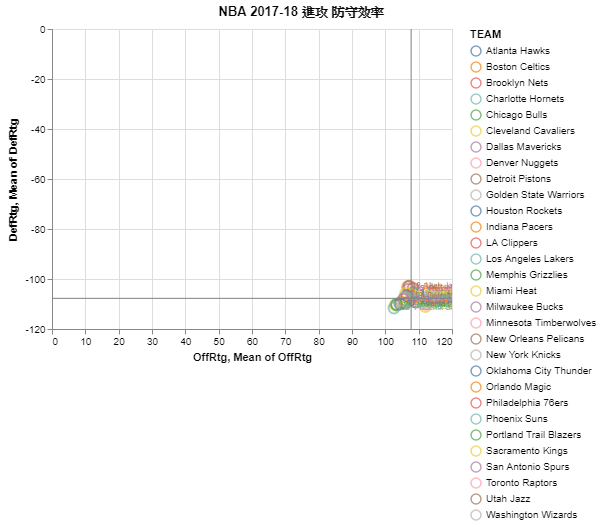

In [28]:
# select dataframe soruce form list

# the following list look liks:
# index:      0                             1            2,3..
# [ [dataframe, season_title], [dataframe, season_title], ... ]
source_1718 = season_lst[0][0]
source_1718_title = season_lst[0][1]

# show 2017-18 season scatter plot
show_scatter(source_1718, source_1718_title)
    

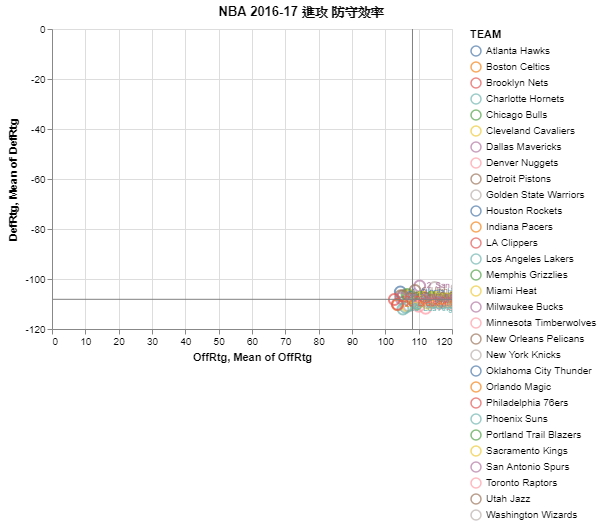

In [29]:
source_1617 = season_lst[1][0]
source_1617_title = season_lst[1][1]

# show 2016-17 season scatter plot
show_scatter(source_1617, source_1617_title)

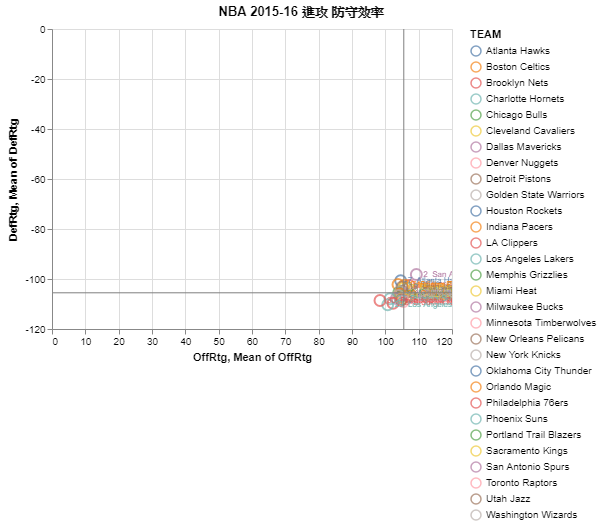

In [30]:
source_1516 = season_lst[2][0]
source_1516_title = season_lst[2][1]

# show 2015-16 season scatter plot
show_scatter(source_1516, source_1516_title)

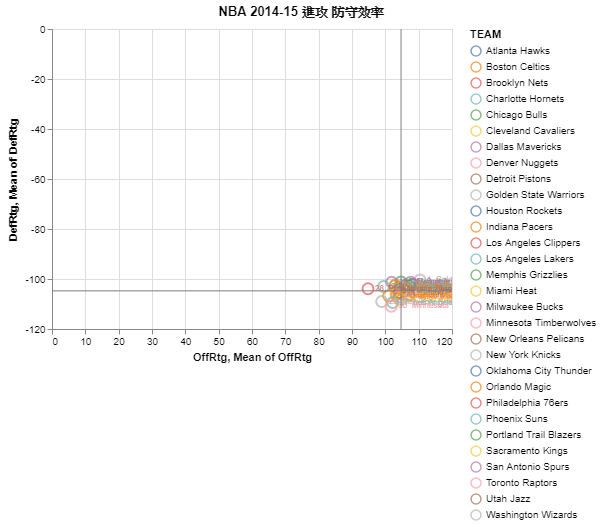

In [31]:
source_1415 = season_lst[3][0]
source_1415_title = season_lst[3][1]

# show 2014-15 season scatter plot
show_scatter(source_1415, source_1415_title)

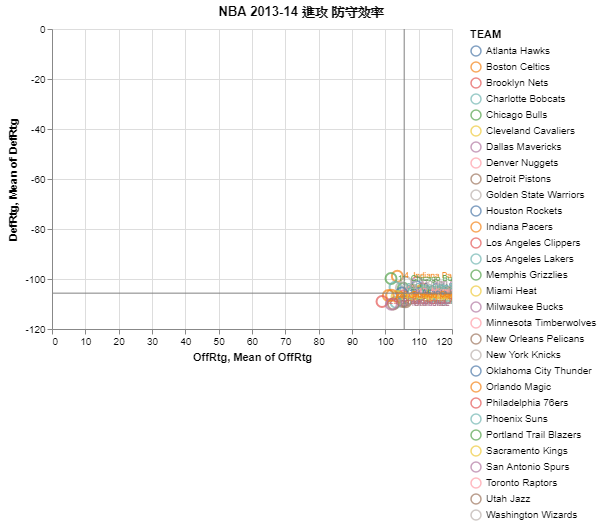

In [32]:
source_1314 = season_lst[4][0]
source_1314_title = season_lst[4][1]

# show 2013-14 season scatter plot
show_scatter(source_1314, source_1314_title)

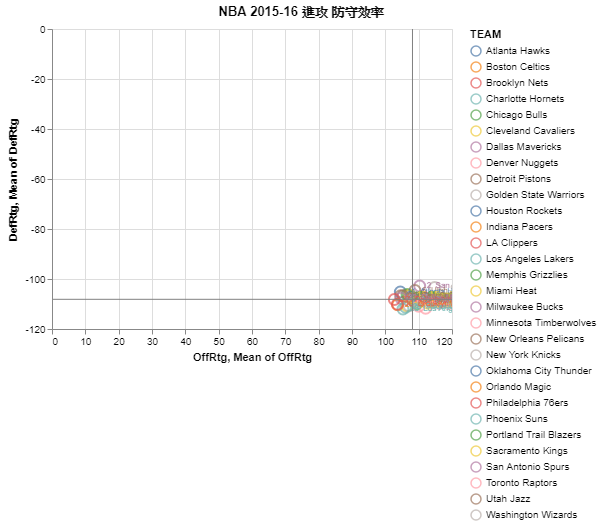

In [33]:
source_sample = season_lst[1][0]
source_tile_sample =  season_lst[2][1]

show_scatter(source_sample, source_tile_sample)

# for df_source, source_title in season_lst:
#     #print(source_title)
#     show_scatter(df_source, source_title)